## Contents:
- [Imports](#Imports)
- [Prepare Dataset](#Prepare-Dataset)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [CNN Model](#CNN-Model)
- [Visualize Predictions](#Visualize-Predictions-to-Actual)
- [Model Topography and Training History](#Model-Topography-and-Training-History)
- [Model Evaluation](#Model-Evaluation)

# Imports

In [55]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score
from time import perf_counter 
import seaborn as sns
import os

# Prepare Dataset

In [207]:
def image_dataset_from_directory(img_height, image_width, batch_size):
    """INPUT: image height, image width, batch_size
        OUTPUT: training_ds, validation_ds, class_names"""
    
    ## Defining batch specfications
    batch_size = 100
    
    # loading training set
    training_ds = tf.keras.preprocessing.image_dataset_from_directory(
        './dataset/train',
        seed=42,
        image_size= (img_height, img_width),
        batch_size=batch_size)
    
    print('')
    
    # loading training set
    validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './dataset/valid/',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)
    
    class_names = training_ds.class_names
    print('')
    print(class_names)
    assert training_ds.class_names == validation_ds.class_names
    return training_ds, validation_ds, class_names

In [208]:
training_ds, validation_ds, class_names = image_dataset_from_directory(250, 250, 100)

Found 69079 files belonging to 37 classes.

Found 17068 files belonging to 37 classes.

['Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust_', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca', 'Grape___Leaf_blight', 'Grape___healthy', 'Orange___Haunglongbing', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepperbell___Bacterial_spot', 'Pepperbell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Toma

# Exploratory Data Analysis

In [226]:
#EDA Functions
def samples_and_label_to_df():
    """Returns sample size and labels in a dataframe"""    
    sample_size = []
    sample_name = []
    for i in class_names:
        directory = f'./dataset/train/{i}/'
        sample_name.append(i)
        sample_size.append(len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))]))
        samples_df = pd.DataFrame(zip(sample_name, sample_size))
        samples_df.rename(columns= {0:'label', 1:'samples'},inplace=True)
    return samples_df

def dataframe_to_barh():
    """Plots dataframe with label and sample"""
    samples_df = samples_and_label_to_df()
    samples_df.plot(x='label', y='samples', kind='barh', figsize = (20,20)); 
    plt.title(f'Samples_per_class', fontsize=20)
    plt.show();
    
def view_images():
    """View images in validation dataset"""
    plt.figure(figsize=(10, 10))
    for images, labels in validation_ds.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

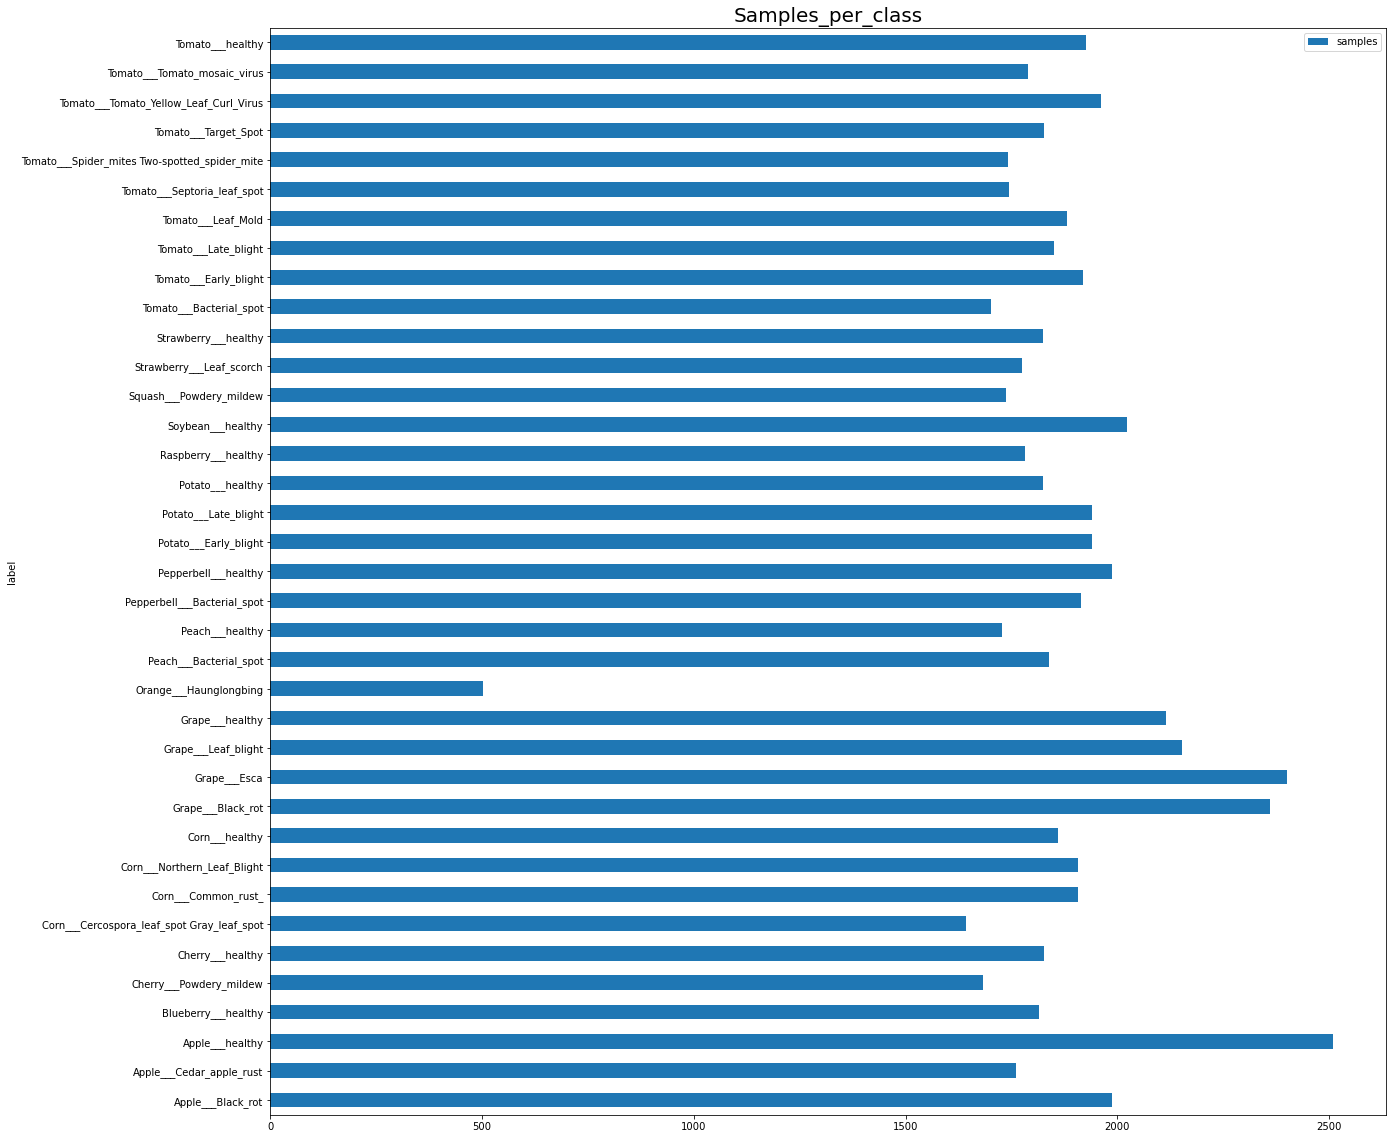

In [203]:
dataframe_to_barh()

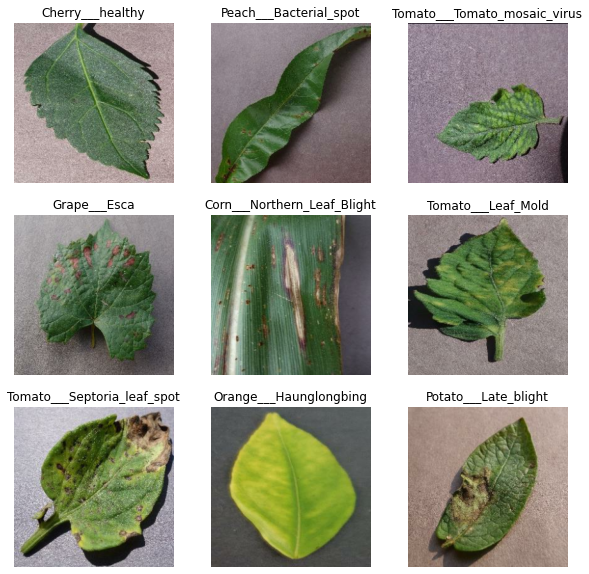

In [227]:
view_images()

# CNN Model

In [67]:
image_size = 250 # define input shape as image size

model0 = tf.keras.models.Sequential([
  layers.Conv2D(32, 3, activation='relu',input_shape=(image_size, image_size, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(len(class_names), activation= 'softmax')
])

early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

model0.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history0 = model0.fit(training_ds, validation_data = validation_ds, batch_size = 32, epochs = 10, callbacks = [early])

Epoch 1/10
691/691 [==============================] - 4668s 7s/step - loss: 20.6775 - accuracy: 0.1890 - val_loss: 1.3404 - val_accuracy: 0.6151
Epoch 2/10
691/691 [==============================] - 5564s 8s/step - loss: 1.1329 - accuracy: 0.6637 - val_loss: 0.6592 - val_accuracy: 0.8059
Epoch 3/10
691/691 [==============================] - 6001s 9s/step - loss: 0.6017 - accuracy: 0.8145 - val_loss: 0.4762 - val_accuracy: 0.8558
Epoch 4/10
691/691 [==============================] - 5951s 9s/step - loss: 0.3879 - accuracy: 0.8776 - val_loss: 0.3888 - val_accuracy: 0.8809
Epoch 5/10
691/691 [==============================] - 5406s 8s/step - loss: 0.2978 - accuracy: 0.9052 - val_loss: 0.4181 - val_accuracy: 0.8763
Epoch 6/10
691/691 [==============================] - 5458s 8s/step - loss: 0.2585 - accuracy: 0.9218 - val_loss: 0.3862 - val_accuracy: 0.8918
Epoch 7/10
691/691 [==============================] - 5435s 8s/step - loss: 0.2032 - accuracy: 0.9372 - val_loss: 0.4307 - val_accuracy

In [69]:
model0.save('./models/model0.h5')

In [91]:
model0.save('./models/my_model0')

INFO:tensorflow:Assets written to: ./models/my_model0\assets


# Visualize Predictions to Actual

In [189]:
model0 = tf.keras.models.load_model('./models/model0.h5') #Load Model

In [210]:
def visualize_preds_actual():
    """Visualize predictions compared to actuals"""
    accuracy = []
    plt.figure(figsize=(30, 30))
    for images, labels in validation_ds.take(1):
        predictions = model0.predict(images)
        pred_label = []
        p_label = []
        for item in predictions:
            pred_label.append(class_names[np.argmax(item)])
            p_label.append(np.argmax(item))
        accuracy = np.array(p_label) == labels
        for i in range(30):
            ax = plt.subplot(10, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title('Prediction: ' + pred_label[i] + '  ' + 'Actual: '+ class_names[labels[i]] )
            plt.axis('off')
            plt.grid(True)

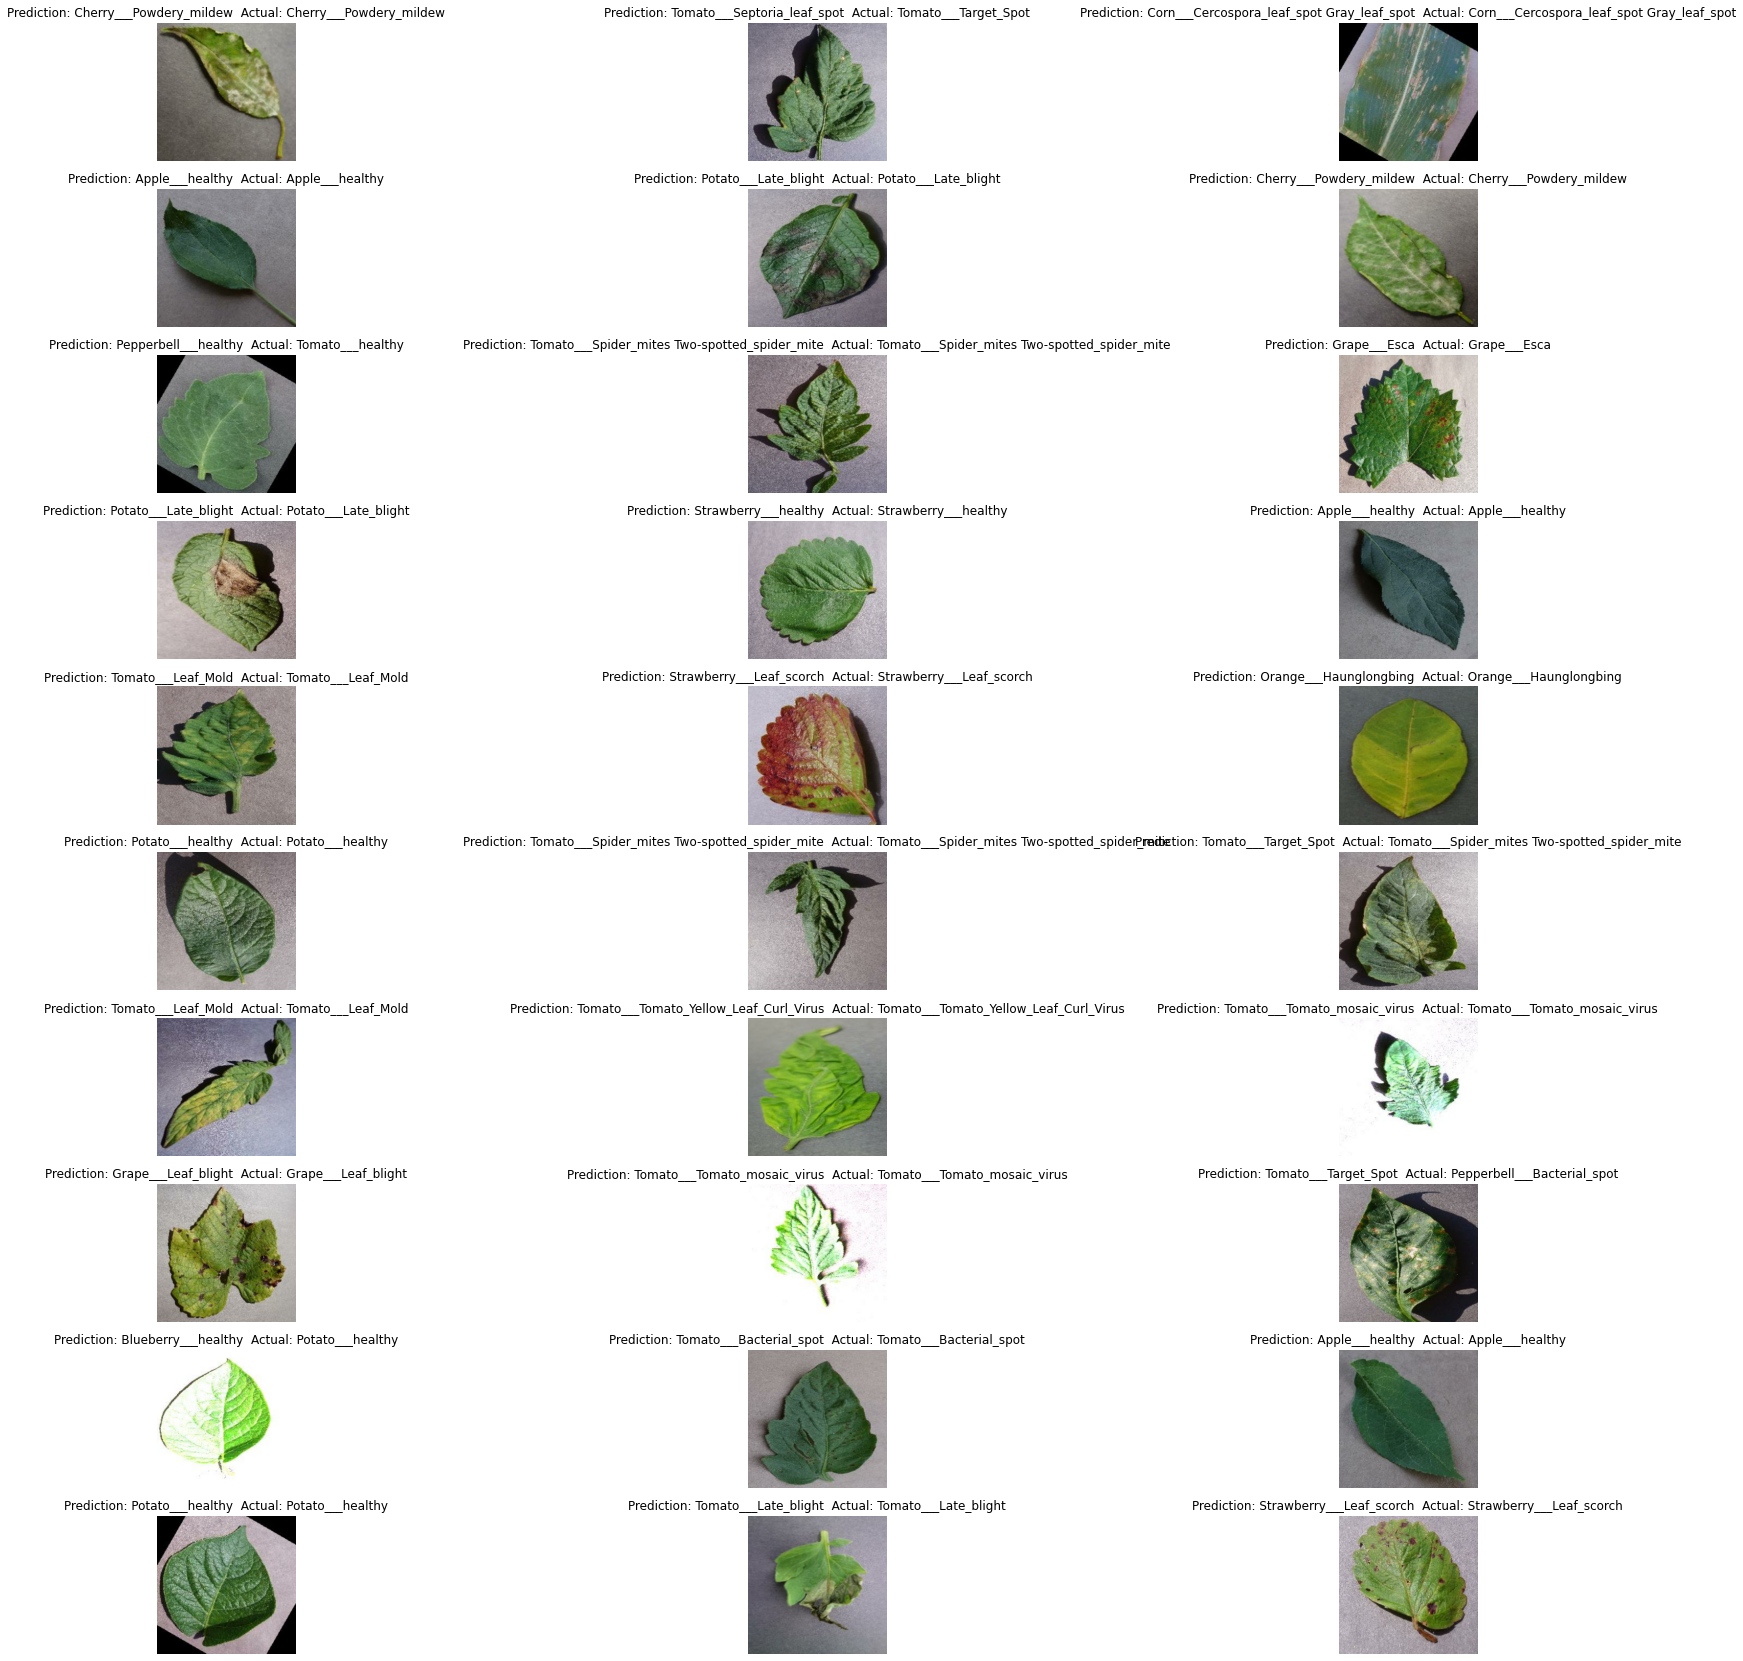

In [211]:
visualize_preds_actual()

# Model Topography and Training History

In [218]:
def plot_model_val_and_train_accuracy():
    """Plots validation and training accuracy and saves image in app_pics folder"""
    plt.plot(history0.history['accuracy'], label='Train accuracy')
    plt.plot(history0.history['val_accuracy'], label='Val accuracy')
    plt.savefig('./app_pics/model_accuracy.png', transparent=True, bbox_inches='tight')
    plt.legend();
    
def plot_model_val_and_train_loss():
    """Plots validation and training loss and saves image in app_pics folder"""
    plt.plot(history0.history['loss'], label = 'training loss')
    plt.plot(history0.history['accuracy'], label = 'training accuracy')
    plt.legend();
    plt.savefig('./app_pics/training_accuracy.png', transparent=True, bbox_inches='tight')

def plot_model_validation_metrics():
    """Plots validation loss and accuracy and saves image in app_pics folder"""
    plt.plot(history0.history['val_loss'], label = 'validation loss')
    plt.plot(history0.history['val_accuracy'], label = 'validation accuracy')
    plt.legend();
    plt.savefig('./app_pics/validation_accuracy.png', transparent=True, bbox_inches='tight')
    
def plot_model_training_metrics():
    """Plots training loss and accuracy and saves image in app_pics folder"""
    plt.plot(history0.history['loss'], label = 'training loss')
    plt.plot(history0.history['accuracy'], label = 'training accuracy')
    plt.legend();
    plt.savefig('./app_pics/training_accuracy.png', transparent=True, bbox_inches='tight')   

In [221]:
# Model Topography
model0.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 29, 29, 128)      

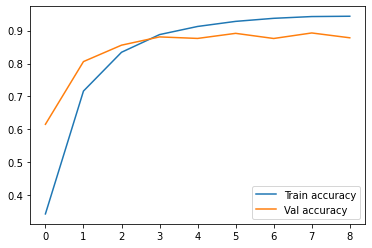

In [219]:
plot_model_val_and_train_accuracy()

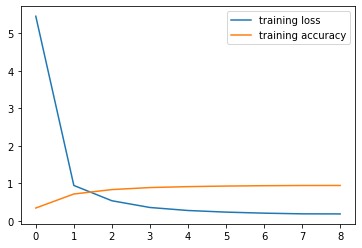

In [220]:
plot_model_val_and_train_loss()

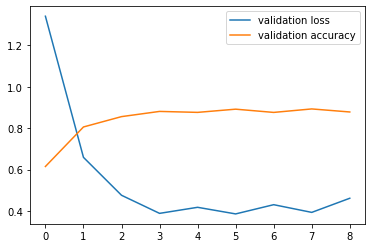

In [215]:
plot_validation_accuracy()

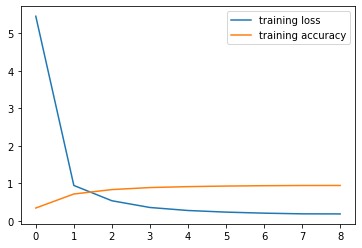

In [217]:
plot_model_training_metrics()

# Model Evaluation

In [365]:
def prepare_evaluation_ds(dataset):
    """INPUT: dataset, OUTPUT: y_preds, y_ds"""
    preds_label = []
    val_labels_list = []
    for images, labels in dataset.take(len(dataset)):
        #valid_labels
        val_labels_list.append(labels)
        predictions = model0.predict(images)

        #apply argmax to predictions
        for item in predictions:
            #pred_label.append(class_names[np.argmax(item)])
            preds_label.append(np.argmax(item))

    val_concat = np.concatenate(val_labels_list)
    
    y_preds = preds_label
    y_ds = val_concat
    
    return y_preds, y_ds

def plot_confusion_matrix(y_true,y_preds):
    """Plots confusion matrix, INPUT: (y_true, y_pred)"""
    con_mat = tf.math.confusion_matrix(labels=label, predictions=y_preds).numpy()

    con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

    con_mat_df = pd.DataFrame(con_mat_norm,
                         index = classes, 
                         columns = classes)

    con_mat_df_values = pd.DataFrame(con_mat,
                         index = classes, 
                         columns = classes)
    figure = plt.figure(figsize=(40, 40))
    sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.autumn_r)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


def get_model_metrics(y_true, y_preds):
    """INPUT: (y_true, y_pred), OUTPUT(recall score, precision score, and accuracy score)"""
    recall = recall_score(y_true, y_preds, average='weighted')
    precision = precision_score(y_true, y_preds, average='weighted')
    accuracy = accuracy_score(y_true, y_preds)
    print(f'Recall Score: {np.round(recall,3)}'), 
    print(f'Precision Score: {np.round(precision,3)}'), 
    print(f'Accuracy Score: {np.round(accuracy,3)}')

In [347]:
y_preds, y_ds = prepare_evaluation_ds(validation_ds)

In [364]:
get_model_metrics(y_ds, y_preds)

Recall Score: 0.878
Precision Score: 0.884
Accuracy Score: 0.878


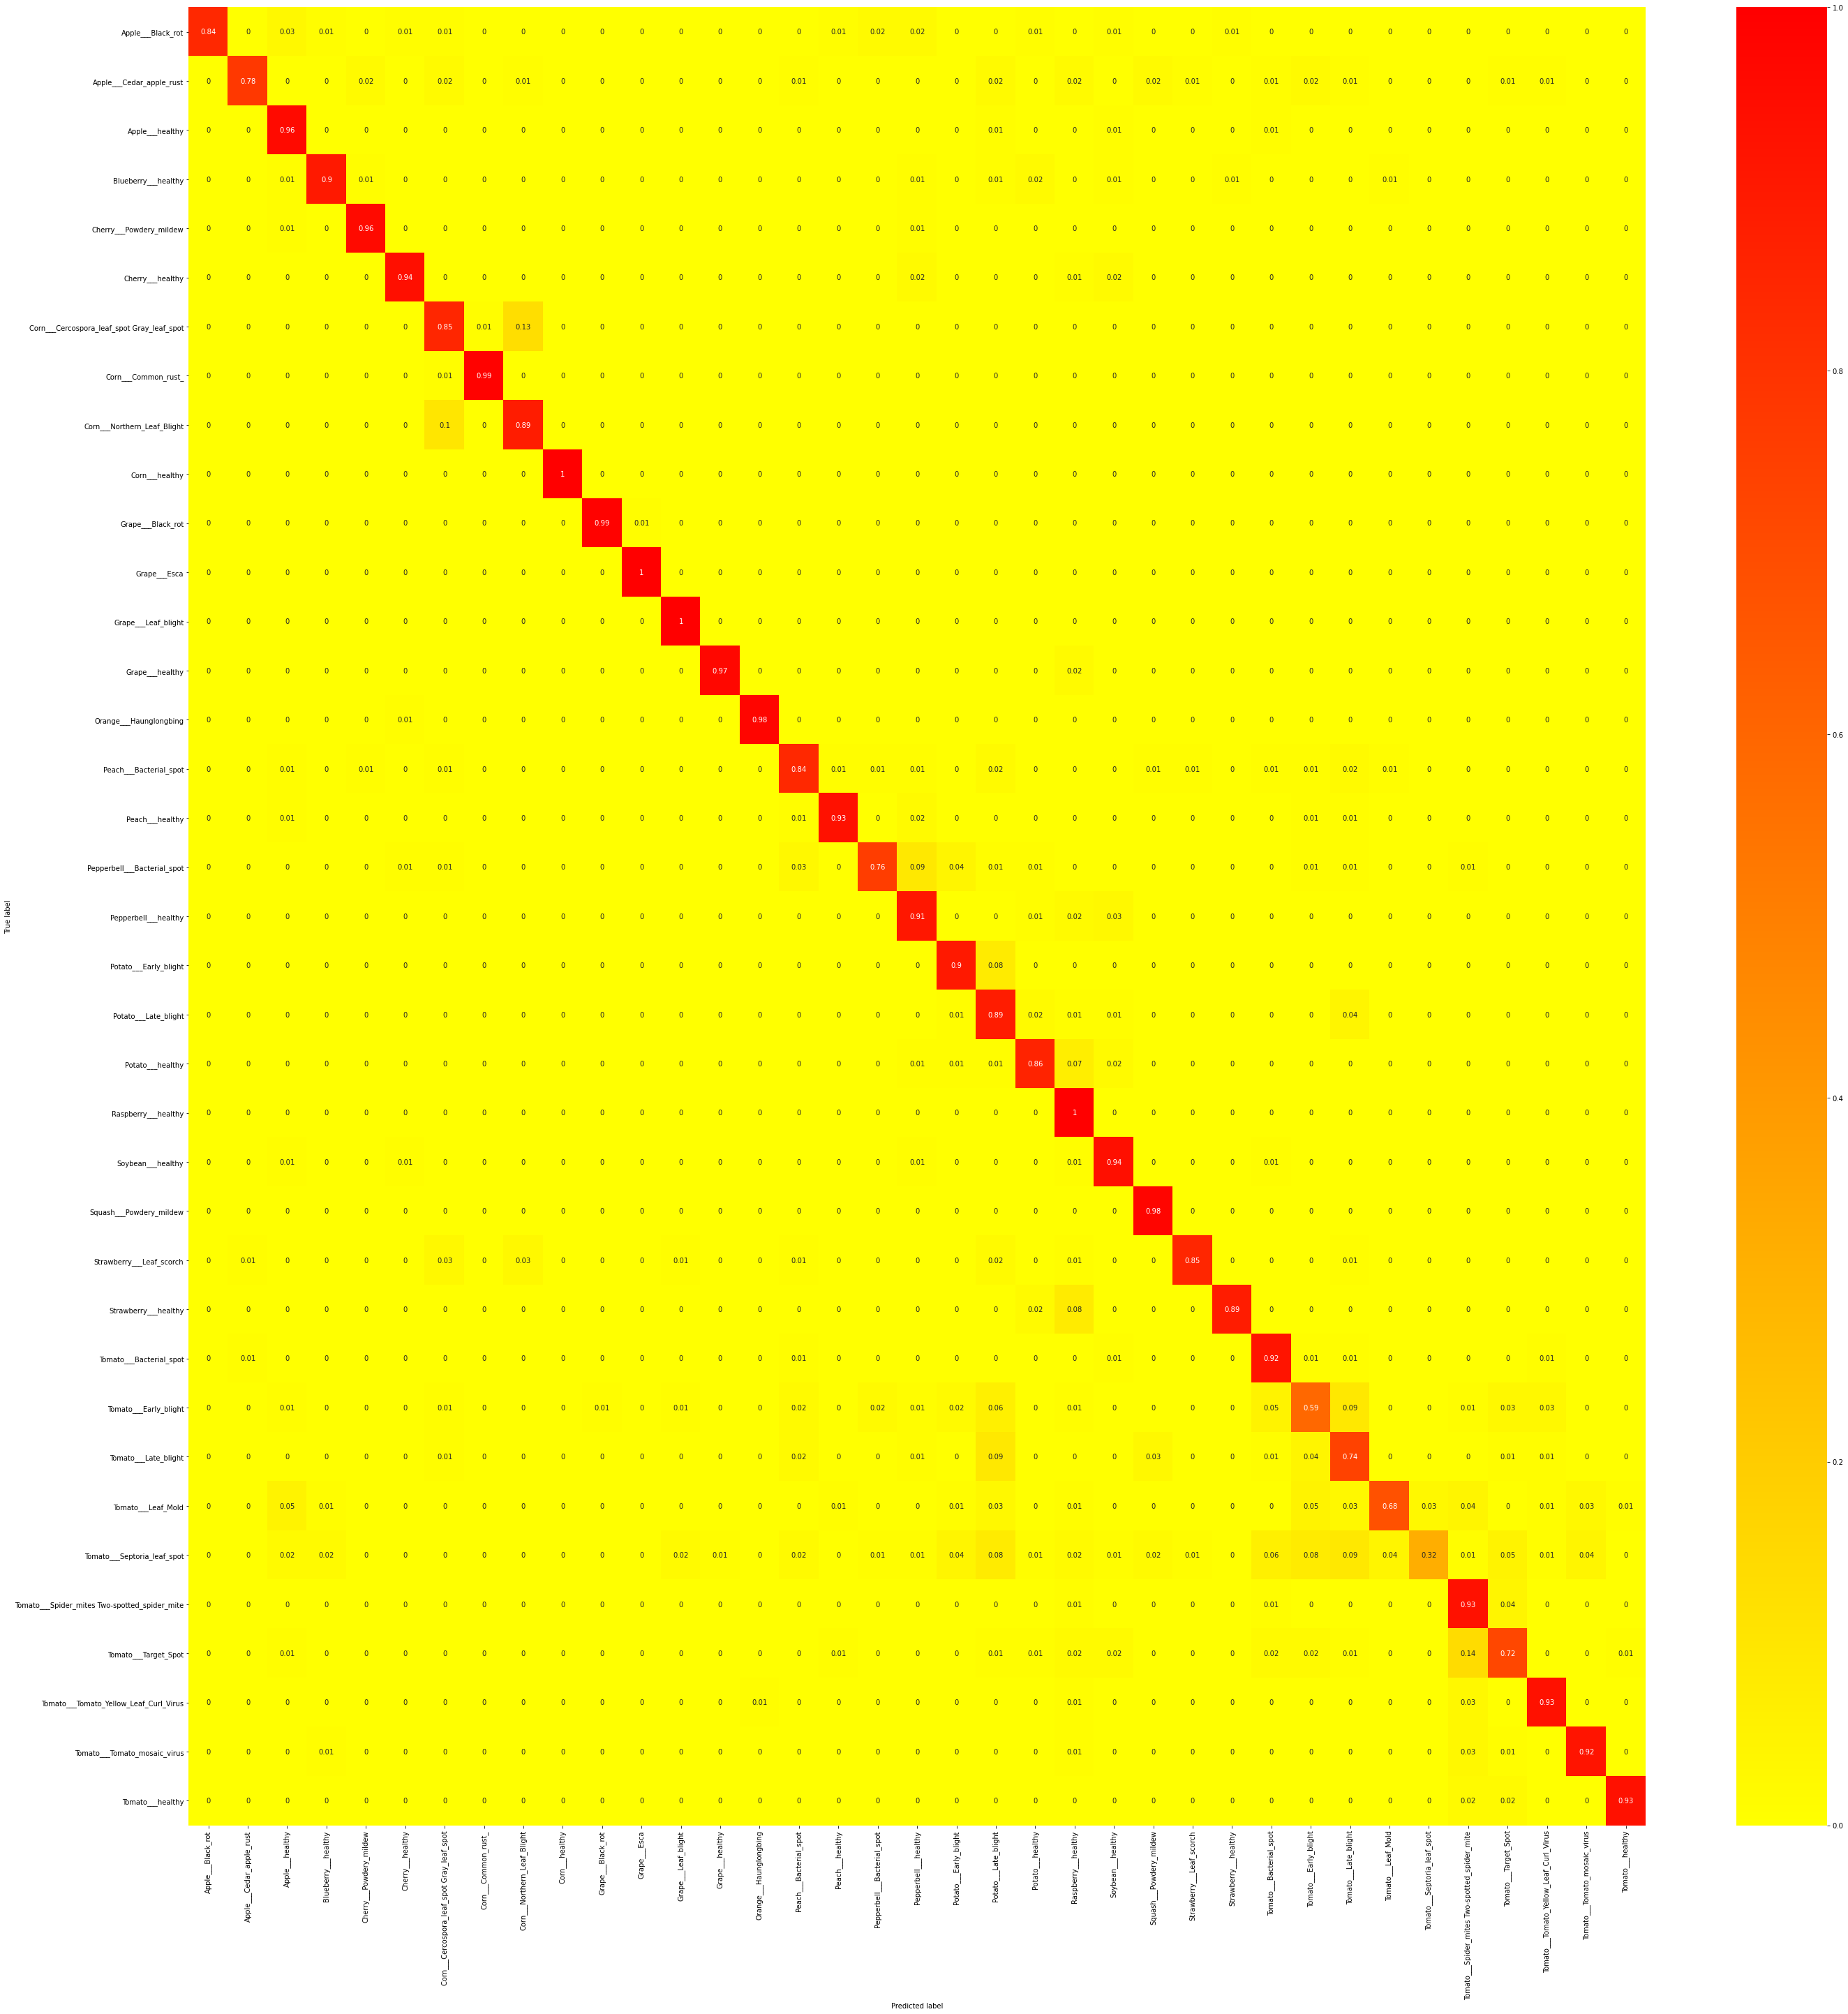

In [349]:
plot_confusion_matrix(y_ds, y_preds)

Recall Score: 0.878
Precision Score: 0.884
Accuracy Score: 0.878
